In [1]:
import cv2
from google.colab.patches import cv2_imshow
import os 
os.chdir('/content/sample_data')

In [2]:
import pandas as pd

In [3]:
import os 
from google.colab import drive
drive.mount("/content/drive")
os.chdir("/content/drive/MyDrive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import zipfile
#with zipfile.ZipFile("/content/drive/MyDrive/dsp/ass 2/Reduced MNIST Data.zip","r") as zip_ref:
with zipfile.ZipFile("/content/Reduced MNIST Data.zip","r") as zip_ref:
    #zip_ref.extractall("/content/drive/MyDrive/dsp/ass 2/data")
    zip_ref.extractall("/content/data")

In [19]:
img = cv2.imread('/content/drive/MyDrive/dsp/ass 2/data/Reduced MNIST Data/Reduced Testing data/0/781.jpg',0)

In [6]:
#loading training data
import cv2
import os
import numpy as np
def collect_data(filename):
  images = []
  labels = []
  #filename = '/content/drive/MyDrive/dsp/ass 2/data/Reduced MNIST Data/Reduced Trainging data'
  for folder in np.sort(os.listdir(filename)):
    for filee in os.listdir(os.path.join(filename,folder)):
      img = cv2.imread(os.path.join(filename,folder,filee),0) 
      #print(os.path.join(filename,folder,filee))
      if img is not None:
        images.append(img)
        labels.append(int(folder))
  return images,labels

In [7]:
#train_data,train_labels = collect_data('/content/drive/MyDrive/dsp/ass 2/data/Reduced MNIST Data/Reduced Trainging data')
#test_data,test_labels = collect_data('/content/drive/MyDrive/dsp/ass 2/data/Reduced MNIST Data/Reduced Testing data')
train_data,train_labels = collect_data('/content/data/Reduced MNIST Data/Reduced Trainging data')
test_data,test_labels = collect_data('/content/data/Reduced MNIST Data/Reduced Testing data')

In [8]:
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels).reshape(1,10000)
test_labels = np.array(test_labels).reshape(1,2000)

In [9]:
def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]
    
    #print(vmax ,hmax )

    i = 0

    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):
    	
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1

        
        else:                                    # going down

        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 

        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1

        		i = i + 1

        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break

    #print ('v:',v,', h:',h,', i:',i)
    return output

In [10]:
from scipy.fftpack import dct
def do_dct(images):
  images_dct = []
  for i in range(images.shape[0]):
    img = dct(dct(images[i], norm='ortho' ,axis=0),norm='ortho' ,axis=1)
    img = zigzag(img)
    images_dct.append(img[0:180])
  return(images_dct)

In [11]:
train_dct = do_dct(train_data)
test_dct = do_dct(test_data)
train_dct = np.array(train_dct)
test_dct = np.array(test_dct)

# KMEANS with 1 cluster per class


In [27]:
from sklearn.cluster import KMeans
import time
num_cluster_per_num = 1
kmeans = KMeans(n_clusters=num_cluster_per_num*10, random_state=0,max_iter=300)
time_before_fitting = time.time()
kmeans.fit(train_dct)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = kmeans.fit_predict(test_dct)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 5.074188709259033
Processing time is : 0.7437334060668945


In [28]:
def map_clast(y_pred,num_cluster):
  mapped = []
  for i in range(0,10):
    mapped.append(np.bincount(y_pred[i*200:(i+1)*200]).argsort()[-num_cluster:])
  return mapped

In [29]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [24]:
"""def map_predict(y_pred,mapped):
  mapped = []
  for i in range(y_pred.shape[0]):
    for j in range(len(mapped_labels)):
      if bool(np.isin(y_pred[i],mapped_labels[j])):
        mapped.append(j)
        break;
  return mapped
predicted_lables = map_predict(Y_pred,mapped_labels)"""

'def map_predict(y_pred,mapped):\n  mapped = []\n  for i in range(y_pred.shape[0]):\n    for j in range(len(mapped_labels)):\n      if bool(np.isin(y_pred[i],mapped_labels[j])):\n        mapped.append(j)\n        break;\n  return mapped\npredicted_lables = map_predict(Y_pred,mapped_labels)'

In [25]:
"""new_labels = np.zeros(2000)
for i in range(0,10):
  new_labels[i*200:(i+1)*200] = mapped_labels[i][0]"""

'new_labels = np.zeros(2000)\nfor i in range(0,10):\n  new_labels[i*200:(i+1)*200] = mapped_labels[i][0]'

In [30]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(new_outputs[0],test_labels[0])

0.7185

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=10)),
("log_reg", LogisticRegression(max_iter=10000)),
])
time_before_fitting = time.time()
pipeline.fit(train_dct, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
out_puts = pipeline.predict(test_dct)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 15.893531560897827
Processing time is : 0.004044294357299805


In [67]:
print('accuracy_score = ',accuracy_score(out_puts,test_labels[0]))

accuracy_score =  0.8295


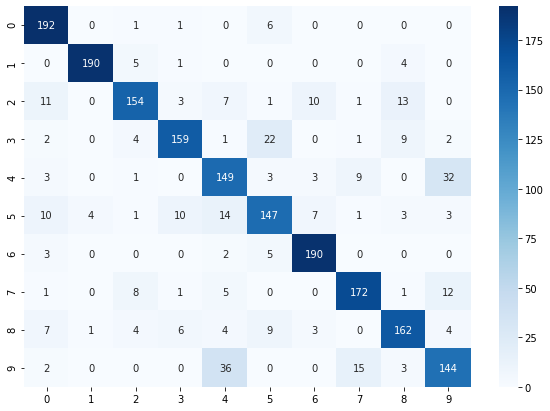

In [68]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

KMEANS with 4 cluster per class

In [69]:
from sklearn.cluster import KMeans
import time
num_cluster_per_num = 4
kmeans = KMeans(n_clusters=num_cluster_per_num*10, random_state=0,max_iter=300)
time_before_fitting = time.time()
kmeans.fit(train_dct)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = kmeans.fit_predict(test_dct)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 11.544849634170532
Processing time is : 1.7368009090423584


In [70]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [71]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(new_outputs[0],test_labels[0])

0.8465

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=40)),
("log_reg", LogisticRegression(max_iter=10000)),
])
time_before_fitting = time.time()
pipeline.fit(train_dct, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
out_puts = pipeline.predict(test_dct)
time_after_test = time.time()
print("Processing time is :",time_before_test-time_before_test)

Processing time is : 124.03902769088745
Processing time is : 0.0


In [74]:
print('accuracy_score = ',accuracy_score(out_puts,test_labels[0]))

accuracy_score =  0.9375


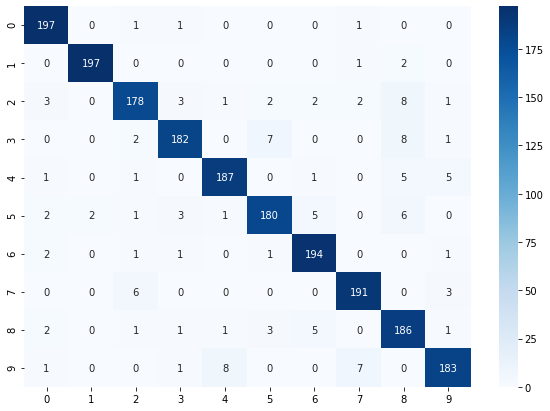

In [75]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

KMEANS with 16 cluster per class

In [76]:
num_cluster_per_num = 16
kmeans = KMeans(n_clusters=num_cluster_per_num*10, random_state=0,max_iter=300)
time_before_fitting = time.time()
kmeans.fit(train_dct)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = kmeans.fit_predict(test_dct)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 26.66353988647461
Processing time is : 4.374177694320679


In [77]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [78]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [79]:
accuracy_score(new_outputs[0],test_labels[0])

0.9225

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=160)),
("log_reg", LogisticRegression(max_iter=10000)),
])
time_before_fitting = time.time()
pipeline.fit(train_dct, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
out_puts = pipeline.predict(test_dct)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 248.31310081481934
Processing time is : 0.011961221694946289


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [81]:
print('accuracy_score = ',accuracy_score(out_puts,test_labels[0]))

accuracy_score =  0.951


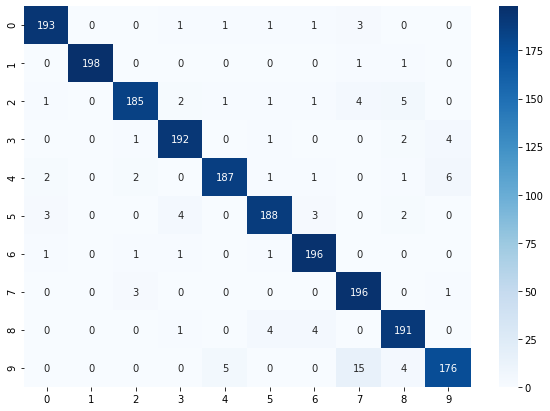

In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

# GMM with 1 cluster per class


In [83]:
from sklearn.mixture import GaussianMixture as GMM 
import time
num_cluster_per_num = 1
gmm = GMM(n_components=num_cluster_per_num*10,) #random_state=0,max_iter=300)
time_before_fitting = time.time()
gmm.fit(train_dct)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = gmm.predict(test_dct)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 19.335511922836304
Processing time is : 0.07410120964050293


In [84]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [85]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [86]:
accuracy_score(new_outputs[0],test_labels[0])

0.5425

# GMM with 4 cluster per class

In [134]:
num_cluster_per_num = 4
gmm = GMM(n_components=num_cluster_per_num*10,) #random_state=0,max_iter=300)
time_before_fitting = time.time()
gmm.fit(train_dct)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = gmm.predict(test_dct)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 31.978002071380615
Processing time is : 0.29430198669433594


In [135]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [146]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(np.random.choice(range(0,10),1)[0])
new_outputs = np.array(new_outputs).reshape(1,2000)

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(new_outputs[0],test_labels[0])

0.8565

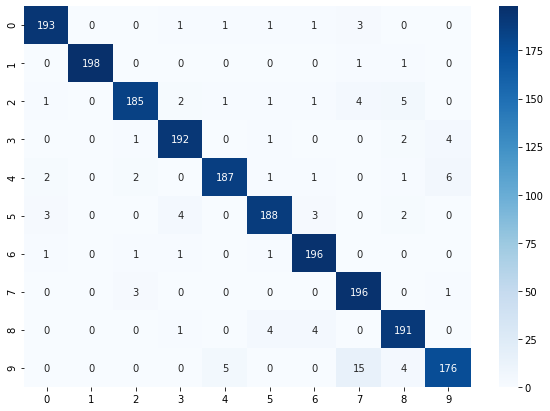

In [148]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

# GMM with 16 cluster per class

In [125]:
num_cluster_per_num = 16
gmm = GMM(n_components=num_cluster_per_num*10,) #random_state=0,max_iter=300)
time_before_fitting = time.time()
gmm.fit(train_dct)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = gmm.predict(test_dct)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 37.676072120666504
Processing time is : 1.128004789352417


In [126]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [127]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      #new_outputs.append(200)
      new_outputs.append(np.random.choice(range(0,j)+range(j,10),1))
new_outputs = np.array(new_outputs).reshape(1,2000)

In [128]:
accuracy_score(new_outputs[0],test_labels[0])

1.0

In [ ]:
print('accuracy_score = ',accuracy_score(out_puts,test_labels[0]))


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

# SVM

In [149]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import shuffle

In [150]:
clf = SVC(C=.1,kernel = 'linear')
x , y = shuffle(train_dct,train_labels.reshape(10000,))
time_before_fitting = time.time()
clf.fit(x, y.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = clf.predict(test_dct)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 79.96160054206848
Processing time is : 1.0277454853057861


In [151]:
accuracy_score(Y_pred,test_labels[0])

0.931

In [157]:
clf = SVC(kernel = 'poly',degree=3)

time_before_fitting = time.time()
clf.fit(train_dct, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = clf.predict(test_dct)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 5.232467889785767
Processing time is : 1.5281012058258057


In [158]:
accuracy_score(Y_pred,test_labels[0])

0.974

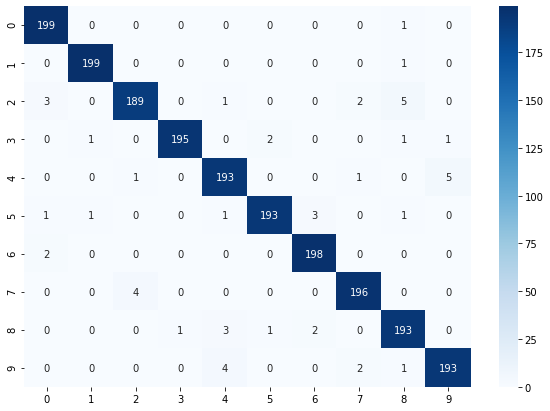

In [159]:
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],Y_pred))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

In [154]:
clf = SVC(kernel = 'rbf',degree=3)

time_before_fitting = time.time()
clf.fit(train_dct, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = clf.predict(test_dct)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 5.974727392196655
Processing time is : 1.9890506267547607


In [155]:
accuracy_score(Y_pred,test_labels[0])

0.973